In [7]:
from commonfunctions import *
import cv2


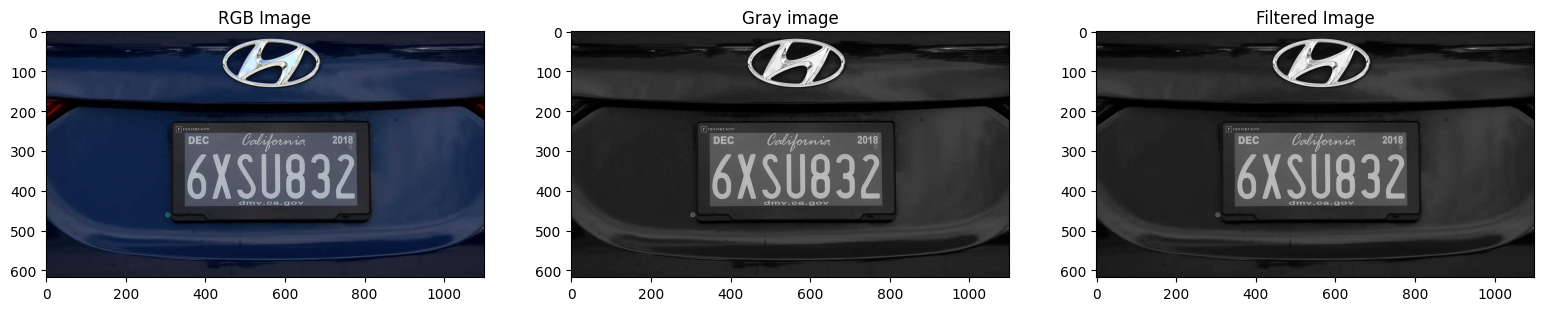

In [13]:
def preprocess_image(img):
    gray_img = rgb2gray(img)
    gray_img = (gray_img*255).astype(np.uint8)    
    filtered_img = cv2.bilateralFilter(gray_img, 5, 20, 100, borderType=cv2.BORDER_CONSTANT)
    return filtered_img



img = io.imread('imgs/License1.jpg')
show_images([img,rgb2gray(img),preprocess_image(img)],titles=['RGB Image','Gray image','Filtered Image'])

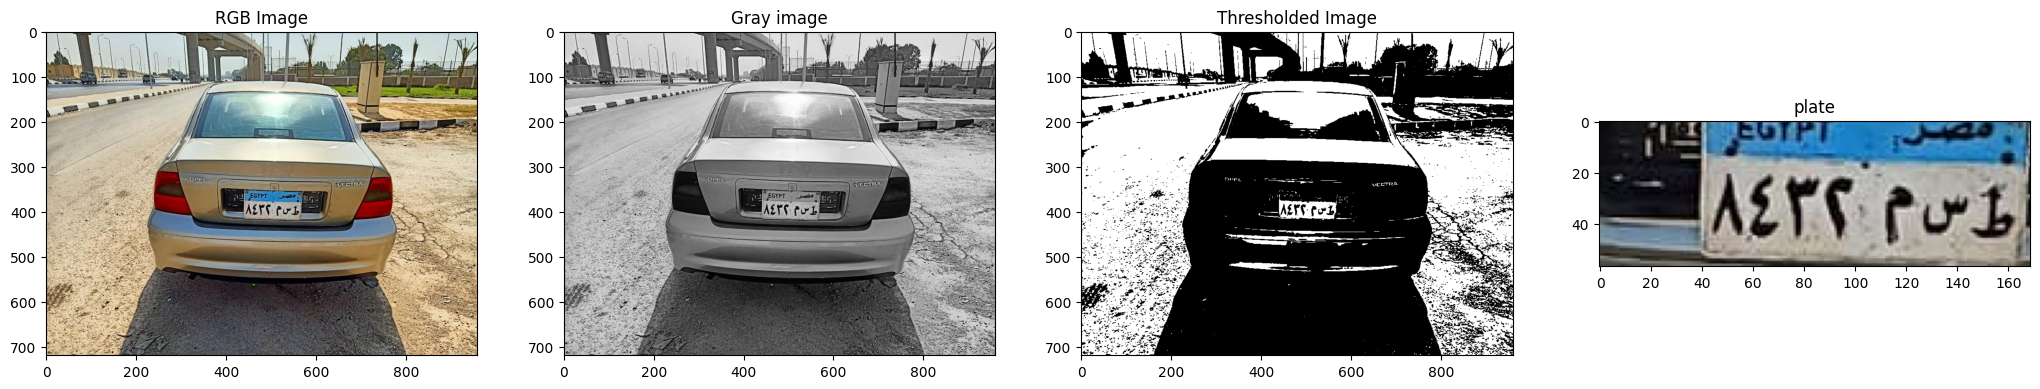

In [67]:
import cv2

img = io.imread('imgs/0006.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = (gray).astype(np.uint8)
filtered_img = cv2.bilateralFilter(gray_img, 5, 20, 100, borderType=cv2.BORDER_CONSTANT)



# Perform thresholding or other preprocessing steps as needed to isolate the plate
# For example, you can use adaptive thresholding
# thresh = cv2.adaptiveThreshold(filtered_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
_, mask = cv2.threshold(filtered_img, 150, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

plate = None
filtered_contours = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h
    area = cv2.contourArea(contour)
    if (aspect_ratio > 2.5) and (aspect_ratio < 3.5):
        filtered_contours.append(contour)

if filtered_contours:
    max_contour = max(filtered_contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)
    plate = img[y:y + h, x:x + w]




show_images([img,gray,mask,plate],titles=['RGB Image','Gray image','Thresholded Image','plate'])


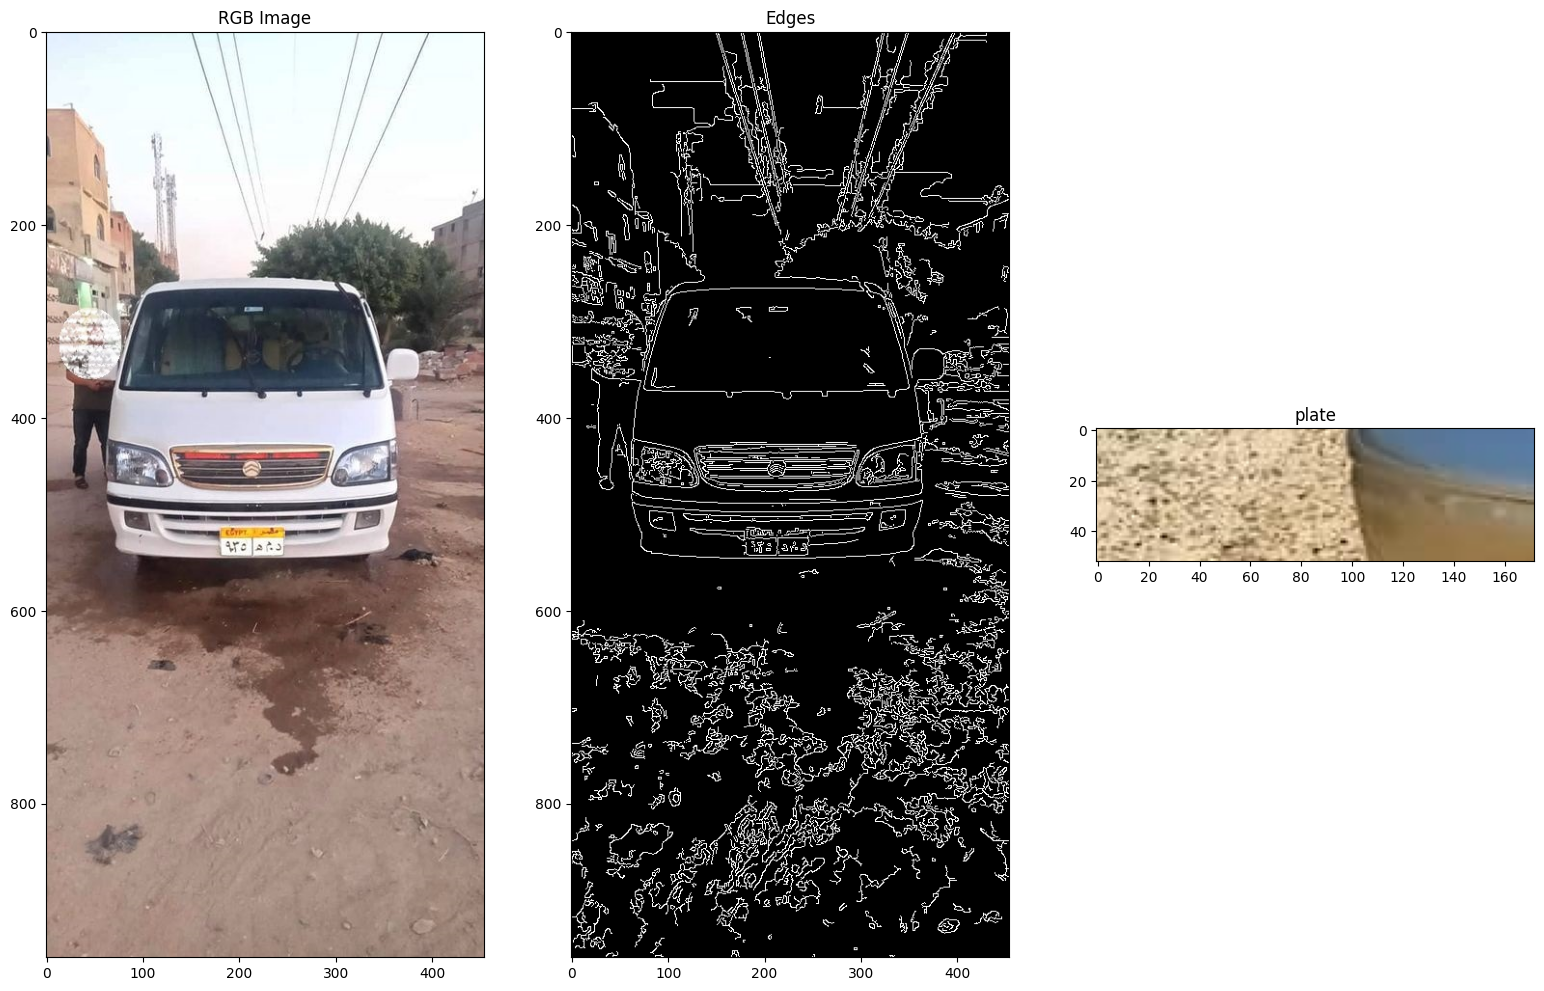

In [69]:
image = io.imread('imgs/0008.jpg')
filtered_img = cv2.bilateralFilter(image, 5, 20, 100, borderType=cv2.BORDER_CONSTANT)
gray = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)
equalized_image = cv2.equalizeHist(gray)
edges = cv2.Canny(equalized_image, 50, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plate = None
filtered_contours = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h
    area = cv2.contourArea(contour)
    if (aspect_ratio > 2.5) and (aspect_ratio < 3.5) and (area < 300):
        filtered_contours.append(contour)

if filtered_contours:
    max_contour = max(filtered_contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)
    plate = img[y:y + h, x:x + w]

show_images([image,edges,plate],titles=['RGB Image','Edges','plate'])


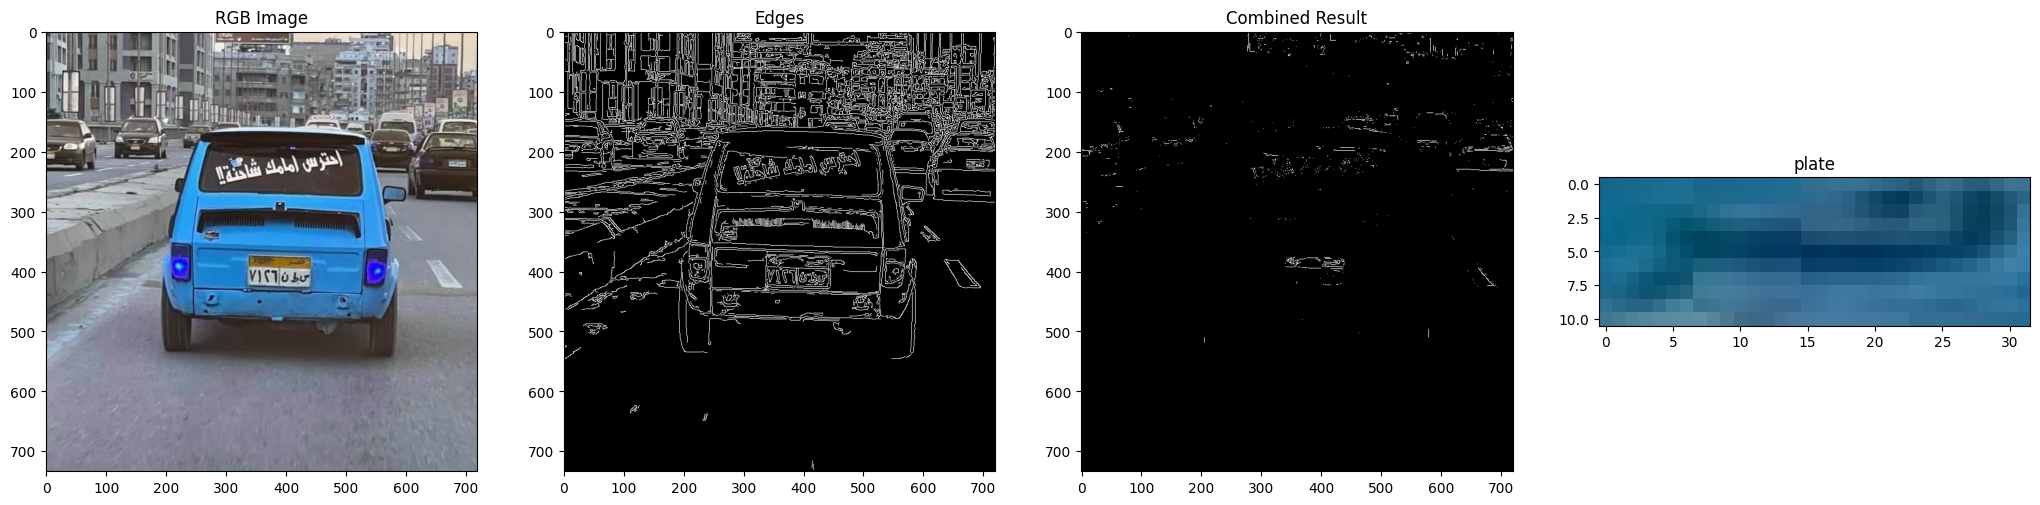

In [66]:
image = cv2.imread('imgs/0001.jpg')

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define ranges for blue, white, and black colors in HSV
lower_blue = np.array([90, 50, 50])  # Define your blue color range
upper_blue = np.array([130, 255, 255])

lower_white = np.array([0, 0, 200])  # Define your white color range
upper_white = np.array([180, 30, 255])

lower_black = np.array([0, 0, 0])  # Define your black color range
upper_black = np.array([180, 255, 30])

# Create masks for blue, white, and black colors
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_white = cv2.inRange(hsv, lower_white, upper_white)
mask_black = cv2.inRange(hsv, lower_black, upper_black)

# Combine masks to identify regions with desired colors
combined_mask = cv2.bitwise_or(mask_blue, mask_white)
combined_mask = cv2.bitwise_or(combined_mask, mask_black)

# Perform edge detection (Canny) on the image
edges = cv2.Canny(image, 50, 150)

# Combine edge detection results with color-based segmentation
combined_result = cv2.bitwise_and(edges, combined_mask)

# Find contours in the combined result
contours, _ = cv2.findContours(combined_result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through contours and filter based on area, aspect ratio, etc.
plate = None
filtered_contours = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h
    area = cv2.contourArea(contour)
    if (aspect_ratio > 2.5) and (aspect_ratio < 3.5) and (area < 400):
        filtered_contours.append(contour)

if filtered_contours:
    max_contour = max(filtered_contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)
    plate = img[y:y + h, x:x + w]

show_images([image,edges,combined_result,plate],titles=['RGB Image','Edges','Combined Result','plate'])